In [ ]:
# Connecting my Google Drive to use at as local starage

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder = '.'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

In [ ]:
filepaths = [f.path for f in os.scandir('.') if f.is_file()]
dirpaths  = [f.path for f in os.scandir('.') if f.is_dir()]

In [ ]:
for (dirpath, dirnames, filenames) in os.walk('.'):
    for f in filenames:
        print('FILE :', os.path.join(dirpath, f))
    for d in dirnames:
        print('DIRECTORY :', os.path.join(dirpath, d))

DIRECTORY : ./.config
DIRECTORY : ./drive
DIRECTORY : ./sample_data
FILE : ./.config/.last_update_check.json
FILE : ./.config/.last_survey_prompt.yaml
FILE : ./.config/active_config
FILE : ./.config/.last_opt_in_prompt.yaml
FILE : ./.config/config_sentinel
FILE : ./.config/gce
DIRECTORY : ./.config/logs
DIRECTORY : ./.config/configurations
DIRECTORY : ./.config/logs/2022.12.02
FILE : ./.config/logs/2022.12.02/14.34.32.909002.log
FILE : ./.config/logs/2022.12.02/14.33.58.505085.log
FILE : ./.config/logs/2022.12.02/14.33.33.357010.log
FILE : ./.config/logs/2022.12.02/14.34.06.248571.log
FILE : ./.config/logs/2022.12.02/14.34.32.154508.log
FILE : ./.config/logs/2022.12.02/14.33.09.027980.log
FILE : ./.config/configurations/config_default
DIRECTORY : ./drive/.shortcut-targets-by-id
DIRECTORY : ./drive/MyDrive
DIRECTORY : ./drive/.file-revisions-by-id
DIRECTORY : ./drive/Shareddrives
DIRECTORY : ./drive/.Trash-0
FILE : ./drive/MyDrive/Untitled document.gdoc
FILE : ./drive/MyDrive/DATA605-gr

In [ ]:
import pathlib

path = pathlib.Path.home() / 'src'
for p in path.iterdir():
    if p.is_file() and p.suffix == '.py':
        print(p.name)

FileNotFoundError: ignored

In [ ]:
path = pathlib.Path.home() / 'src'
for p in path.glob('*.py'):
    print(p.name)

In [ ]:
!pip install folderstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/pandas-dev/pandas

Cloning into 'pandas'...
remote: Enumerating objects: 328172, done.
remote: Total 328172 (delta 0), reused 0 (delta 0), pack-reused 328172
Receiving objects: 100% (328172/328172), 284.44 MiB | 17.28 MiB/s, done.
Resolving deltas: 100% (275215/275215), done.


In [ ]:
!folderstats pandas/ -p -i -v -o pandas.csv

2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/sphinxext
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/cheatsheet
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/_templates
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/_templates/autosummary
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/scripts
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/whatsnew
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/reference
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/user_guide
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/user_guide/templates
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/getting_started
2022-12-06 01:04:50, folderstats DEBUG FOLDER: pandas/doc/source/getting_started/intro_tutorials
2022-12-06 01:04:50, folderstats DE

In [ ]:
import folderstats

df = folderstats.folderstats('pandas/', ignore_hidden=True)
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,pandas/MANIFEST.in,MANIFEST,in,1228,2022-12-06 01:04:49,2022-12-06 01:04:49,2022-12-06 01:04:49,False,NaN,0,1,0
1,3,pandas/setup.cfg,setup,cfg,3064,2022-12-06 01:04:49,2022-12-06 01:04:49,2022-12-06 01:04:49,False,NaN,0,1,0
2,4,pandas/setup.py,setup,py,21964,2022-12-06 01:04:49,2022-12-06 01:04:49,2022-12-06 01:04:49,False,NaN,0,1,0
3,5,pandas/LICENSE,LICENSE,None,1634,2022-12-06 01:04:49,2022-12-06 01:04:49,2022-12-06 01:04:49,False,NaN,0,1,0
4,6,pandas/README.md,README,md,10564,2022-12-06 01:04:49,2022-12-06 01:04:49,2022-12-06 01:04:49,False,NaN,0,1,0


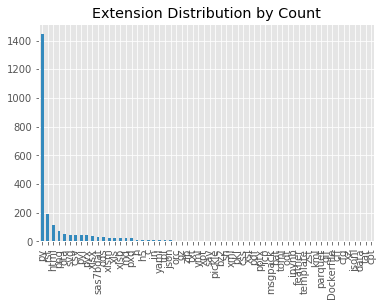

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');

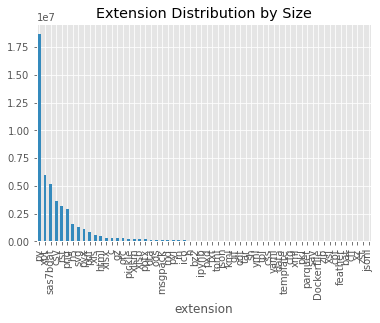

In [ ]:
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)

    extension_sizes.plot(
        kind='bar', color='C1', title='Extension Distribution by Size');

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


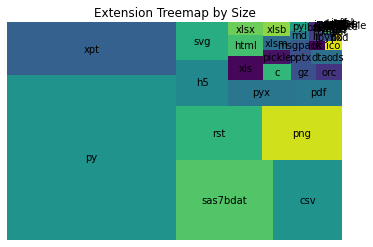

In [ ]:
import squarify

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('extension')['size'].sum()
# Sort elements by size
extension_counts = extension_sizes.sort_values(ascending=False)

squarify.plot(sizes=extension_counts.values, label=extension_counts.index.values)
plt.title('Extension Treemap by Size')
plt.axis('off');

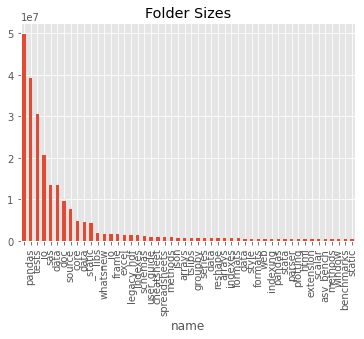

In [ ]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_sizes = df_folders.sort_values(by='size', ascending=False)

    # Show the size of the largest 50 folders as a bar plot
    df_sizes['size'][:50].plot(kind='bar', color='C0', title='Folder Sizes');

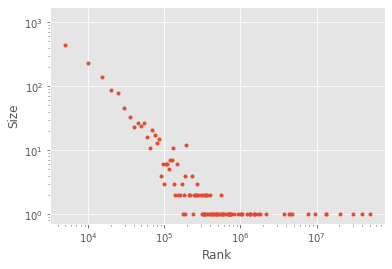

In [ ]:
import numpy as np

with plt.style.context('ggplot'):
    y, bins = np.histogram(df['size'], bins=10000)
    plt.loglog(bins[:-1], y, '.');
    plt.ylabel('Size')
    plt.xlabel('Rank')

In [ ]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)

# Print some additional information
print(nx.info(G))

Graph with 2665 nodes and 2664 edges


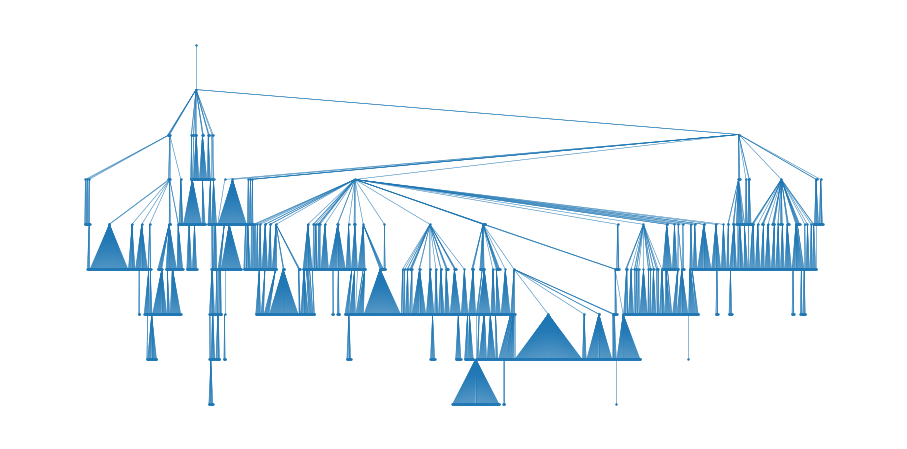

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

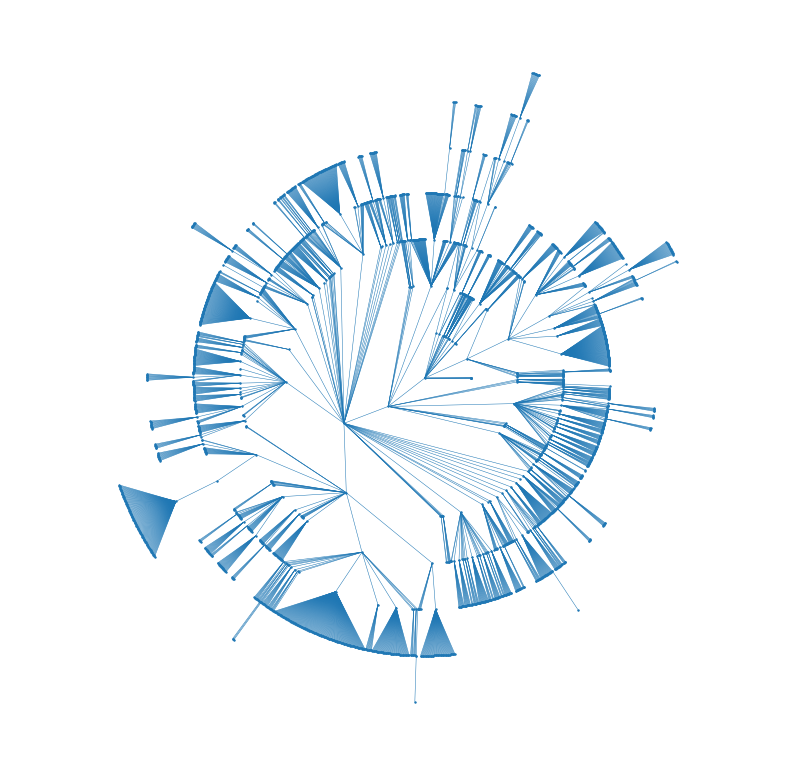

In [ ]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');